### Dimension Reduction (차원 축소)
- 우리가 다루는 데이터들은 보통 3차원 공간에선 표현하기 힘든 고차원(high dimension)의 데이터인 경우가 많다.
- 차원이 커질 수록 데이터 간 거리가 크게 늘어나며, 데이터가 희소화(Spares) 된다(차원의 저주).
> - 희소 데이터(Spares Data): 차원/전체 공간에 비해 데이터가 있는 공간이 매우 협소한 데이터
> - 밀집 데이터(Dense Data): 차원/전체 공간에 비해 데이터가 있는 공간이 빽빽하게 차 있는 데이터
- 고차원을 이루는 피처 중 상대적으로 중요도가 떨어지는 피처가 존재할 수 있기 때문에 계산 비용이 많고 분석에 필요한 시각화가 어렵다.
- 머신러닝에서는 고차원 데이터를 다루는 경우가 많으며, 희소 데이터를 학습 시 예측 성능이 좋지 않다.
- 차원 축소를 통해 Spares Data를 Dense하게 만들 필요가 있다.
- feature가 많을 경우 feauture간 상관관계가 높아질 가능성이 높고, 이로 인해 선형 회귀 모델에서 다중 공선성(Multicollinearity) 문제가 발생할 수 있다.
- 차원 축소로 인해 표현력이 일부 손실되지만, 손실을 감수하더라도 계산 효율을 얻기 위해 사용한다.
---

#### PCA (Principal Component Analysis), 주성분 분석
- 고차원(x<sub>1</sub>, ···, x<sub>n</sub>)의 데이터를 저차원 (x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>)으로 압축하는 대표적인 차원 축소(Dimension reduction) 방법이다.
- 데이터의 특성을 눈으로 쉽게 파악할 수 있도록 하며, 연산 속도에 큰 이점을 얻을 수 있다.
- 고차원 데이터를 저차원 데이터로 압축하기 위해서는 먼저 데이터를 가장 잘 표현하는 축(Principal Component(PC), 주성분)을 설정해야 한다.
- 주성분 분석을 통해 저차원 공간으로 변환할 때 feature 추출(feature extraction)을 진행한다. feature 추출은 기존 피처를 조합해 새로운 feature로 만드는 것을 의미하며, 새로운 feature와 기존 feature 간 연관성이 없어야 한다.
- 연관성이 없도록 하기 위해서는 내적했을 때 0이 나와야 하고 이는 서로 직교(직각, 90도)하는 것을 의미한다. 따라서 직교 변환을 수행한다.
- 직교 변환을 수행할 때 기존 feature와 관련 없으면서 기존 데이터의 표현력을 잘 보존해야하고 이는 다른 말로 "분산(Variance)을 최대로 하는 주축을 찾는다" 라고 할 수 있다.
- 예를 들어, 2차원 공간이 있고 1차원 공간으로 차원을 축소 한다면 1차원 공간상에서 데이터 분포가 가장 넓게 퍼지게 만드는 벡터(Eigen vector, 고유 벡터)를 찾아야 한다.
- 찾은 고유 벡터 축에 feature들을 투영시키면 이게 바로 주성분이 된다.
- Eigen vector를 구하기 위해서는 고유값 분해(EVD, Eigen Value decomposition) 혹은 특이값 분해 (SVD, Singular Value Decomposition)가 수행되어야 하고, 이를 통해 구한 주축에 투영을 하기 위해서 공분산 행렬이 필요하다. 즉, PCA는 데이터들의 공분산 행렬에 대한 특이값 분해(SVD)이다.

<div style="display: flex">
    <div>
        <img src="./images/pca02.gif" style="margin-left: -200px">
    </div>
    <div>
        <img src="./images/pca01.gif" width="700" style="margin-top:50px; margin-left: -350px">
    </div>
</div>

> ##### 공분산 행렬 (Covariance matrix)
> - 공분산이란, 두 피처가 함께 변하는 정도를 의미하며 구하는 공식은 아래와 같다.
<img src="./images/pca03.png" width="150" style="margin:20px; margin-left: 0">
> - n은 행렬 X에 있는 데이터 개수를 나타내며 X의 열축은 feature이고 X의 행축은 데이터 개수이다.
> - 예를 들어, X의 feature가 x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>라고 가정하면, X<sup>T</sup> * X는 다음과 같다.
<img src="./images/pca04.png" width="250" style="margin:20px; margin-left: 0">
> - 전치 행렬과 행렬을 내적하면, 아래와 같은 대칭행렬이 만들어지며, 모든 대각 성분은 같은 피처 간 내적이므로 분산에 해당한다.
<img src="./images/pca05.png" width="250" style="margin:20px; margin-left: 0">
> - feature 간 내적을 통해 수치적으로 i번 피처와 j번 피처가 공변하는 정도를 알 수 있게 되고, 공분산이 커질 수 있으므로 데이터 개수(n)로 나누어 평균을 구한다.<br>
> 🚩위와 같은 행렬을 공분산 행렬이라 하고, 임의의 벡터가 있을 때 공분산 행렬을 곱해주게 되면 그 벡터의 선형 변환(투영)이 이루어진다.

> ##### 고유값 분해(Eigen Value decomposition)와 특이값 분해 (Singular Value Decomposition)
> - 고유값 분해가 주축을 이루는 벡터를 찾는 것이라면, 특이값 분해는 직교하는 벡터들을 찾아내는 것이다.
> - 고유값 분해는 투영시 크기만 변하고 여전히 방향이 변하지 않는 벡터(V)를 찾아내는 것이며, 특이값 분해는 직교하는 벡터를 투영 시 여전히 직교하는 벡터를 찾아내는 것이다.
> - 공분산 행렬을 통해 고유값 또는 특이값을 분해함으로써 PCA에 필요한 주축인 고유 벡터와, 고유 값을 얻을 수 있다.
> - 고유값을 얻은 뒤 내림차순으로 정렬했을 때 가장 첫 번째 값이 분산을 최대로 하는 값이 된다.
> - 고유값 분해는 행렬의 크기가 커질 수록 연산량이 증가하므로 계산 시간이 오래걸릴 수 있으며, 대칭 행렬(m * m)이 아니라면 사용할 수 없다.
> - sklearn의 PCA는 내부적으로 SVD를 사용한다.

#### LDA (Linear Discriminant Analysis), 선형 판별 분석
- PCA와 매우 유사하지만, 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
- PCA는 가장 큰 분산을 가지는 축을 찾았지만, LDA는 입력 데이터의 클래스(카테고리)를 최대한 분리할 수 있는 축을 찾는다.  
즉, 같은 클래스(카테고리)의 데이터에 최대한 근접해서, 다른 클래스(카테고리)의 데이터를 최대한 떨어뜨리는 축을 매핑한다.
<div style="display: flex">
    <div>
        <img src="./images/lda01.png" width="650" style="margin:20px; margin-left: -20px">
    </div>
    <div>
        <img src="./images/lda02.png" width="650" style="margin:20px; margin-left: 0">
    </div>
</div>

- 클래스를 최대한 분리하기 위해서 클래스 간 분산 을 최대화 하고 클래스 내부 분산을 최소화 하는 방식으로 차원을 축소한다.
- 클래스별 산포 행렬을 구하여 이를 통해 클래스 간 분산과 클래스 내부 분산을 구한다.
<img src="./images/lda03.png" width="250" style="margin:20px; margin-left: 0">

##### PCA

##### 회사 파산 데이터

In [1]:
import pandas as pd

company_df = pd.read_csv('./datasets/company.csv')
print(company_df.shape)
company_df.columns

(6819, 96)


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [2]:
company_df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
company_df.isna().sum().sum()

0

In [4]:
company_df.duplicated().sum()

0

In [5]:
company_df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
featrues, targets = company_df.iloc[:, 1:], company_df['Bankrupt?']
over_features, over_targets = smote.fit_resample(featrues, targets)

print('SMOTE 적용 전:\n',pd.Series(targets).value_counts() )
print('SMOTE 적용 후:\n',pd.Series(over_targets).value_counts() )

SMOTE 적용 전:
 Bankrupt?
0    6599
1     220
Name: count, dtype: int64
SMOTE 적용 후:
 Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [7]:
over_company_df = pd.DataFrame(over_features, columns=company_df.iloc[:, 1:].columns)
over_company_df.shape

(13198, 95)

In [8]:
over_company_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.444914,0.503105,0.485695,0.600004,0.600004,0.998894,0.797212,0.809138,0.303371,0.781269,...,0.771939,0.004240,0.622762,0.600004,0.836491,0.288029,0.025978,0.578956,1,0.017621
13194,0.371271,0.403836,0.395104,0.598720,0.598720,0.998983,0.796967,0.808851,0.302757,0.781077,...,0.705378,0.001889,0.623651,0.598717,0.824894,0.292070,0.026672,0.564316,1,0.015804
13195,0.467294,0.492858,0.518435,0.591947,0.591947,0.998868,0.797206,0.809136,0.303414,0.781380,...,0.768287,0.005458,0.623041,0.591946,0.836339,0.287298,0.026578,0.563807,1,0.018109
13196,0.471285,0.526190,0.515315,0.613152,0.613152,0.999017,0.797398,0.809297,0.303438,0.781555,...,0.789720,0.000587,0.623725,0.613150,0.839209,0.283826,0.026857,0.565191,1,0.021063


In [9]:
from sklearn.preprocessing import StandardScaler

over_company_scaled = StandardScaler().fit_transform(over_company_df)
over_company_scaled.shape

(13198, 95)

In [10]:
over_company_scaled_df = pd.DataFrame(over_company_scaled, columns=company_df.iloc[:, 1:].columns)
over_company_scaled_df['target'] = over_targets

In [11]:
over_company_scaled_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,target
0,-1.205817,-0.944052,-1.257770,-0.117923,-0.118885,0.024056,-0.007008,-0.002484,-0.070450,-0.017788,...,-0.070732,-0.093169,-0.118066,-0.116290,0.078443,-0.092118,-0.115848,0.0,-0.421003,1
1,0.013250,0.303798,0.091795,0.447432,0.447243,0.021575,0.045662,0.046792,0.039004,0.038725,...,-0.070732,-0.012246,0.447635,0.154967,-0.082903,16.655925,0.482620,0.0,-0.328339,1
2,-0.484018,-0.125898,-0.448552,-0.118388,-0.124927,0.012109,-0.058688,-0.044787,-0.143972,-0.093798,...,-0.070732,0.007577,-0.118320,0.083218,0.078103,-0.095349,-0.149465,0.0,-0.420888,1
3,-0.825255,-0.649421,-0.625629,-1.271843,-1.274381,-0.004725,0.001519,0.013184,0.014119,0.009989,...,-0.070732,-0.087960,-1.271958,0.036571,-0.136842,-0.085361,-0.055921,0.0,-0.260043,1
4,0.022764,0.306188,0.159502,-0.290130,-0.291326,0.024475,0.044154,0.047092,0.029207,0.043504,...,-0.070732,-0.025968,-0.290147,0.155045,-0.218262,-0.222229,1.014338,0.0,-0.013514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,-0.238857,-0.081096,-0.285608,-0.211511,-0.212600,0.016012,0.027667,0.030442,0.016725,0.012979,...,-0.070732,-0.105369,-0.211393,0.076863,0.023282,-0.135938,1.340678,0.0,-0.396319,1
13194,-1.197012,-1.169379,-1.387227,-0.294240,-0.295442,0.025499,0.001478,0.001654,-0.057185,-0.007804,...,-0.070732,-0.012343,-0.294288,-0.183580,0.125865,-0.087117,-0.089841,0.0,-0.435251,1
13195,0.052318,-0.193440,0.112530,-0.730427,-0.732226,0.013265,0.027009,0.030225,0.021886,0.025043,...,-0.070732,-0.076202,-0.730380,0.073440,0.004716,-0.093703,-0.139592,0.0,-0.385858,1
13196,0.104243,0.171981,0.074587,0.635290,0.635358,0.029194,0.047516,0.046462,0.024704,0.044084,...,-0.070732,-0.004536,0.635277,0.137891,-0.083400,-0.074072,-0.004367,0.0,-0.322587,1


In [13]:
for column in company_df.iloc[:, 1:].columns:
    over_company_scaled_df = over_company_scaled_df[over_company_scaled_df[column].between(-1.96, 1.96)]

over_company_scaled_df.shape

(3311, 96)

In [14]:
over_company_scaled_df.target.value_counts()

target
1    1942
0    1369
Name: count, dtype: int64

In [18]:
over_company_df = pd.DataFrame(over_features, columns=company_df.iloc[:, 1:].columns)
over_company_df['target'] = over_targets
over_company_df.shape

(13198, 96)

In [19]:
over_company_scaled_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,target
4,0.022764,0.306188,0.159502,-0.290130,-0.291326,0.024475,0.044154,0.047092,0.029207,0.043504,...,-0.070732,-0.025968,-0.290147,0.155045,-0.218262,-0.222229,1.014338,0.0,-0.013514,1
11,-0.245532,0.429898,-0.124343,1.315425,1.316422,0.024710,0.052356,0.055658,0.044789,0.024326,...,-0.070732,-0.004720,1.315367,0.170248,-0.234044,-0.036504,0.170695,0.0,0.091260,0
12,0.362732,0.450217,0.416004,0.311895,0.311986,0.032139,0.050864,0.051166,0.024381,0.049911,...,-0.070732,-0.020012,0.311667,0.171431,-0.152271,-0.030250,0.186688,0.0,-0.232207,0
16,0.333556,0.545240,0.378244,0.208386,0.207871,0.026968,0.098760,0.092960,0.130783,0.085131,...,-0.070732,-0.046471,0.208525,0.175620,-0.268929,-0.063814,0.074597,0.0,0.574537,0
17,0.945626,0.876327,0.872369,0.976583,0.977117,0.040038,0.067888,0.062839,0.039266,0.062651,...,-0.070732,0.005859,0.976748,0.200196,-0.251872,-0.070499,0.041390,0.0,0.272086,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13186,-0.134339,0.015385,-0.078774,-0.281901,-0.283086,0.005523,-0.015722,-0.006111,-0.043944,-0.017986,...,-0.070732,-0.055121,-0.281782,0.046490,0.418856,-0.121644,-0.712879,0.0,-0.425435,1
13188,0.026063,0.049301,-0.103433,0.229750,0.229264,0.026249,0.041620,0.037936,0.020037,0.031576,...,-0.070732,-0.030048,0.229774,0.117983,-0.067796,-0.109148,-0.802709,0.0,-0.342121,1
13189,-0.965519,-0.919050,-0.995888,-0.063788,-0.059375,0.009443,-0.005438,0.000248,-0.032954,-0.003964,...,-0.070732,-0.038479,-0.063982,-0.039560,-0.058079,-0.086723,-0.067656,0.0,-0.343155,1
13191,0.174765,0.098705,0.205562,-0.173467,-0.174504,0.027915,0.039349,0.040723,0.011631,0.036144,...,-0.070732,-0.007895,-0.173428,0.104283,0.106163,-0.203038,-0.460006,0.0,-0.428195,1


In [20]:
over_company_df = over_company_df.iloc[over_company_scaled_df.index, :]
over_company_df.shape

(3311, 96)

In [21]:
over_company_df = over_company_df.reset_index(drop=True)
over_company_scaled_df = over_company_scaled_df.reset_index(drop=True)
print(over_company_df.shape[0], over_company_scaled_df.shape[0])

3311 3311


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

company_pca = pca.fit_transform(over_company_scaled_df.iloc[:, :-1])
print(company_pca.shape)

(3311, 2)


In [23]:
# PCA 환된 데이터의 컬럼명을 각각 pca1, pca2, ..., pcan으로 명명
pca_columns=[f'pca{i+1}' for i in range(2)]
company_pca_df = pd.DataFrame(company_pca, columns=pca_columns)
company_pca_df['target']=over_company_scaled_df.target
company_pca_df.head(10)

,pca1,pca2,target
0,-0.278816,0.594834,1
1,-1.377155,-2.972857,0
2,-1.215694,-1.047200,0
3,-2.099931,-3.839891,0
4,-3.834784,-1.846713,0
5,-1.399881,-0.890719,0
6,-2.997569,-1.766894,0
7,-2.279159,-2.133147,0
8,-0.599588,-2.819522,0
9,-1.889665,-3.455704,0


In [24]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32344398 0.13341666]
0.45686064170156704


<Axes: xlabel='pca1', ylabel='pca2'>

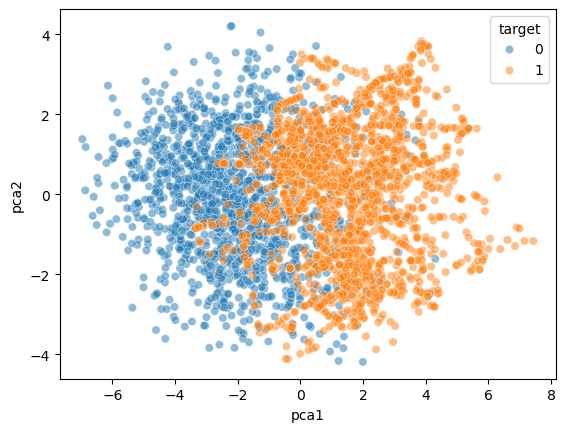

In [25]:
import seaborn as sns

sns.scatterplot(x="pca1", y="pca2", hue='target', data=company_pca_df, alpha=0.5)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=156, max_depth=3, min_samples_split=30)
scores = cross_val_score(rfc, over_company_df.iloc[:, 1:], over_company_df.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.94419306 0.90634441 0.95770393 0.95166163 0.96676737]
원본 데이터 평균 정확도: 0.9453340806459698


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=156, max_depth=3, min_samples_split=30)
scores = cross_val_score(rfc, company_pca_df.iloc[:, :-1], company_pca_df.target, scoring='accuracy', cv=5)
print('PCA 데이터 교차 검증 개별 정확도:',scores)
print('PCA 데이터 평균 정확도:', np.mean(scores))

PCA 데이터 교차 검증 개별 정확도: [0.84012066 0.80362538 0.87613293 0.86102719 0.87915408]
PCA 데이터 평균 정확도: 0.8520120481378701


##### LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 타겟 클래스(카테고리) 개수 -n을 전달한다.
lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(over_company_scaled_df.iloc[:, :-1], over_company_scaled_df.target)
company_lda = lda.transform(over_company_scaled_df.iloc[:, :-1])

print(company_lda.shape)

(3311, 1)


In [31]:
company_lda_df = pd.DataFrame()
company_lda_df['lda']=company_lda.flatten()
company_lda_df['target']=over_company_scaled_df.target
company_lda_df.head(10)

,lda,target
0,-0.395715,1
1,-0.645085,0
2,-1.488840,0
3,-0.892199,0
4,-2.341724,0
5,-1.167866,0
6,-0.912665,0
7,-1.938222,0
8,-0.991055,0
9,-1.079951,0


In [32]:
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.99999439]
0.9999943894629424


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=156, max_depth=3, min_samples_split=30)
scores = cross_val_score(rfc, over_company_df.iloc[:, 1:], over_company_df.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.94419306 0.90634441 0.95770393 0.95166163 0.96676737]
원본 데이터 평균 정확도: 0.9453340806459698


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state=156, max_depth=3, min_samples_split=30)
scores = cross_val_score(rfc, company_lda_df[['lda']], company_lda_df.target, scoring='accuracy', cv=5)
print('LDA 데이터 교차 검증 개별 정확도:',scores)
print('LDA 데이터 평균 정확도:', np.mean(scores))

LDA 데이터 교차 검증 개별 정확도: [0.94268477 0.86706949 0.94561934 0.92598187 0.94259819]
LDA 데이터 평균 정확도: 0.9247907296778809
